In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import xgboost as xgb
import lightgbm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error

##### Loading in the data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ss = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,customer_id_39075,31,admin.,married,university.degree,no,no,no,cellular,dec,...,3,999,1,failure,-2.97,46.3565,-23.10,1.711,5023.5,0
1,customer_id_34855,31,technician,single,university.degree,no,no,no,telephone,may,...,4,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0
2,customer_id_7107,47,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,...,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0,0
3,customer_id_31614,36,services,married,university.degree,no,no,no,cellular,may,...,1,999,1,failure,-1.77,46.4465,-32.34,2.329,5099.1,0
4,customer_id_34878,34,admin.,single,high.school,no,no,no,cellular,may,...,9,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     28831 non-null  object 
 1   age             28831 non-null  int64  
 2   job             28831 non-null  object 
 3   marital         28831 non-null  object 
 4   education       28831 non-null  object 
 5   default         28831 non-null  object 
 6   housing         28831 non-null  object 
 7   loan            28831 non-null  object 
 8   contact         28831 non-null  object 
 9   month           28831 non-null  object 
 10  day_of_week     28831 non-null  object 
 11  duration        28831 non-null  float64
 12  campaign        28831 non-null  int64  
 13  pdays           28831 non-null  int64  
 14  previous        28831 non-null  int64  
 15  poutcome        28831 non-null  object 
 16  emp_var_rate    28831 non-null  float64
 17  cons_price_idx  28831 non-null 

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12357 entries, 0 to 12356
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     12357 non-null  object 
 1   age             12357 non-null  int64  
 2   job             12357 non-null  object 
 3   marital         12357 non-null  object 
 4   education       12357 non-null  object 
 5   default         12357 non-null  object 
 6   housing         12357 non-null  object 
 7   loan            12357 non-null  object 
 8   contact         12357 non-null  object 
 9   month           12357 non-null  object 
 10  day_of_week     12357 non-null  object 
 11  duration        12357 non-null  float64
 12  campaign        12357 non-null  int64  
 13  pdays           12357 non-null  int64  
 14  previous        12357 non-null  int64  
 15  poutcome        12357 non-null  object 
 16  emp_var_rate    12357 non-null  float64
 17  cons_price_idx  12357 non-null 

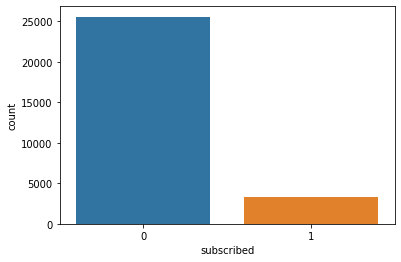

In [6]:
sns.countplot(train['subscribed'])

###### Preprocessing

In [7]:
num_cols = train.describe().columns
cat_cols = train.drop(num_cols, axis= 1).columns

In [9]:
cat_cols = cat_cols.drop('customer_id')

In [10]:
df_train = train.drop(['customer_id','subscribed'], axis=1)
df_test = test.drop('customer_id', axis=1)

In [11]:
# checking no of unique values
for col in cat_cols:
    print(col,':>',df_train[col].nunique())

job :> 12
marital :> 4
education :> 8
default :> 3
housing :> 3
loan :> 3
contact :> 2
month :> 10
day_of_week :> 5
poutcome :> 3


In [12]:
df_train.shape,df_test.shape

((28831, 20), (12357, 20))

In [14]:
# categorical encoding
for cat in cat_cols:
    lb = LabelEncoder()
    lb.fit(df_train[cat])
    df_train[cat] = lb.transform(df_train[cat])
    df_test[cat] = lb.transform(df_test[cat])

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             28831 non-null  int64  
 1   job             28831 non-null  int32  
 2   marital         28831 non-null  int32  
 3   education       28831 non-null  int32  
 4   default         28831 non-null  int32  
 5   housing         28831 non-null  int32  
 6   loan            28831 non-null  int32  
 7   contact         28831 non-null  int32  
 8   month           28831 non-null  int32  
 9   day_of_week     28831 non-null  int32  
 10  duration        28831 non-null  float64
 11  campaign        28831 non-null  int64  
 12  pdays           28831 non-null  int64  
 13  previous        28831 non-null  int64  
 14  poutcome        28831 non-null  int32  
 15  emp_var_rate    28831 non-null  float64
 16  cons_price_idx  28831 non-null  float64
 17  cons_conf_idx   28831 non-null 

In [16]:
y_target = train['subscribed']
X = df_train.copy()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y_target,
                                                   test_size=0.2,random_state=45)

##### Model Buiding

In [17]:
from sklearn.model_selection import KFold
from scipy.stats import mode
from sklearn.metrics import f1_score

In [18]:
def cv(X,y,test,model,random_state = 42,fold = 2):
    tot_val_pred = []
    tot_test_pred = []
    y_copy = y.copy()
    kf = KFold(n_splits=fold, random_state=random_state, shuffle=True)
    for train_index, test_index in kf.split(X,y_copy):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        #over sampling
        #temp_X_train = temp_y_train
        #X_train,y_train = Oversample(1,'target', resample_len=int(lent/4)).fit_transform(temp_X_train,temp_y_train)
        model.fit(X_train,y_train)
        y_pred =  model.predict(X_test)
        y_copy[test_index] = y_pred
        print(f1_score(y_pred,y_test,average = 'weighted'))
        test_pred = model.predict(test)
        tot_test_pred.append(test_pred)
    print('Val f1 score', f1_score(y_copy,y,average = 'weighted'))
    tot_test_pred = mode(tot_test_pred,axis = 0)[0][0]
    return y_copy,tot_test_pred
        

In [21]:
bag = BaggingClassifier(lightgbm.LGBMClassifier(random_state = 45, learning_rate=0.01, n_estimators=500),random_state=45)
estimators = [('LGBM',lightgbm.LGBMClassifier(random_state = 45, learning_rate=0.01, n_estimators=500)),
             ('GBC',GradientBoostingClassifier()),('RFC',RandomForestClassifier()),('KNN',KNeighborsClassifier(n_neighbors=10)),
             ('LGBM_2',lightgbm.LGBMClassifier(random_state = 45, learning_rate=0.01, n_estimators=500,max_depth=5,
                                          num_leaves=36))]
stck =  StackingClassifier(estimators=estimators)
vote =  VotingClassifier([('LGBM',lightgbm.LGBMClassifier(random_state = 45, learning_rate=0.01, n_estimators=500)),('GB',
                         GradientBoostingClassifier(random_state=45))])

In [24]:
val_bag,test_bag = cv(X,y_target,df_test,bag,45,5)
ss['subscribed'] = test_bag
ss.to_csv('./submission/submit_aiinv_bag.csv', index=False)

0.9217441526680595
0.9188605412320044
0.9185982712501785
0.9217056159463071
0.9242950271671442
Val f1 score 0.9210256471058845


In [22]:
val_stk, test_stk = cv(X,y_target,df_test,stck,45,5)
ss['subscribed'] = test_stk
ss.to_csv('./submission/submit_aiinv_stack.csv', index=False)

0.9238368283692512
0.9177285708765403
0.9185419904222458
0.9200438897228043
0.9248204070391235
Val f1 score 0.9210045740018319


In [23]:
val_vote, test_vote = cv(X,y_target,df_test,stck,45,5)
ss['subscribed'] = test_vote
ss.to_csv('./submission/submit_aiinv_vote.csv', index=False)

0.9235127297665671
0.9175518402841335
0.9176772202631568
0.9194393379518725
0.9256372653838253
Val f1 score 0.9207717096441086


In [32]:
print(classification_report(y_target,val))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     25580
           1       0.66      0.54      0.60      3251

    accuracy                           0.92     28831
   macro avg       0.80      0.75      0.77     28831
weighted avg       0.91      0.92      0.91     28831



##### Submitting the file

In [116]:
ss['subscribed'] = test_stk
ss.to_csv('submission_ai_inv.csv', index=False)

3rd Position on LB  for Bagging: Private - 0.9205 ; Public - 0.92230

LB scores (Final):

* Stacking: 0.92104 (unofficial 2nd position)
* Bagging: 0.9205   (Official 3rd position)
* Voting:  0.91976